<a href="https://colab.research.google.com/github/iurykischka/Proc.-de-sinais/blob/master/Ex/Ex02_FFT_IURY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex03 - `[IURY KISCHKA MENDES (0040411)]`

Agora vamos implementar alguns sistemas lineares (SLITs) de tempo contínuo.

**HONESTIDADE ACADÊMICA**

Todo o trabalho feito no sentido do cumprimento das expectativas deste curso deve ser exclusivamente seu. A colaboração de terceiros na realização dos trabalhos não é permitida.

Ver ou copiar o trabalho de outro indivíduo do curso ou retirar material de um livro, site ou outra fonte, mesmo em parte e apresentá-lo como seu próprio constitui desonestidade acadêmica, assim como mostrar ou dar a sua obra, mesmo em parte, a outro estudante. Da mesma forma, é desonestidade acadêmica fornecer ou tornar as soluções disponíveis dos trabalhos para os indivíduos que fazem ou poderão fazer este curso no futuro. Você está convidado a discutir o material do curso com os outros, a fim de melhor compreendê-lo. Você pode até discutir sobre os trabalhos com os colegas, mas você não pode compartilhar códigos, funções, projetos, tabelas, desenhos esquemáticos, mapas ou diagramas.

Você pode e deve recorrer à Web para obter referências na busca de soluções para os trabalhos, mas não por soluções definitivas para os problemas. No entanto, deve-se citar explicitamente no projeto a origem de qualquer procedimento ou técnica que você descubra fora do curso.

Todas as formas de desonestidade acadêmica são tratadas com rigor.

**Instruções:**
- Use a versão Python 3.x
- Não apague os comentários existentes, mas você pode adicionar outros comentários.
- TODO gráfico precisa ter rótulo nos eixos. As figuras devem ter tamanho `plt.figure(figsize=(8,2))`!

**Objetivos**
- Implementar e simular sistemas de tempo contínuo
- Analisar sinais de entrada e saída de um sistema no domínio da frequência

## Implementando sistemas

Vimos que um sistema linear invariante no tempo (SLIT) pode ser representado de diferentes maneiras:
- Diagrama esquemático (circuito)
- Equação diferencial
- Função de transferência
- Resposta ao impulso do sistema
- Resposta em frequência

### Circuito RC
Considere o sistema abaixo representado por seu ***diagrama esquemático***, em que $v_\mathrm{in}$ representa o sinal de entrada e $v_\mathrm{out}$ o sinal de saída.

![circuito_RC](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/1st_Order_Lowpass_Filter_RC.svg/250px-1st_Order_Lowpass_Filter_RC.svg.png)

A partir do diagrama, e usando as relações 
$$ v=Ri, \:\:\: i=C\frac{dv}{dt}, $$
é possível escrever:
$$ v_\mathrm{out}(t) = v_\mathrm{in}(t)-RC \frac{d v_\mathrm{out}}{dt}. $$

Considerando $x(t)\equiv v_\mathrm{in}(t)$ e $y(t)\equiv v_\mathrm{out}(t)$, tem-se a ***equação diferencial*** do sistema representada por:

$$ \label{eq:edo} \tag{1} y(t) + RC \dot{y}(t) - x(t) = 0 .$$

Transformando cada termpo da equação equação acima para o domínio de Laplace, tem se:

$$ \label{eq:lap} \tag{2}  Y(s) + RC s Y(s) - X(s) = 0, $$

em que é possível obter a ***função de transferência*** do sistema:

$$ \label{eq:tf} \tag{3} H(s) = \frac{Y(s)}{X(s)} = \frac{1}{RC s + 1} .$$

Fazendo a transformada inversa de Laplace de $\eqref{eq:tf}$, é possível obter a ***resposta ao impulso***:

$$ \label{eq:ht} \tag{4} h(t) = \frac{1}{RC} e^{- \left(\frac{1}{RC}\right) t} .$$

Por fim, é possível ainda obter a ***resposta em frequência*** do sistema fazendo $H(j\omega)=H(s)|_{s=j\omega}$

$$ H(j\omega) = \frac{1}{RC j\omega + 1} .$$

Na programação, utilizaremos a forma de *função de transferência* $\eqref{eq:tf}$ para implementar no pacote SciPy. Para isso, define-se as variáveis `num` e `den` com os coeficientes do polinômio em $s$ do numerador e do denominador da função de transferência. Por exemplo, para $G(s)=\frac{3 s^2 - 2 s +5}{7 s - 1}$, fazemos:

```num = [3, -2, 5]
den = [7, -1]
sys = signal.lti(num, den)```

Em que `sys` é um objeto que contém todas as informações sobre o sistema $G(s)=\frac{3 s^2 - 2 s +5}{7 s - 1}$. Mais informações [nesse link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lti.html?highlight=lti#scipy.signal.lti).

<mark>**Faça**</mark>: implemente no código abaixo a função de transferêcia do circuito RC $\eqref{eq:tf}$.

In [ ]:
# Importa bibliotecas
import numpy as np, scipy as sp, matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft

# parâmetros
R = 100
C = 47e-3

### SEU CÓDIGO COMEÇA AQUI ### (≈ 3 linhas de código)
num = [1]
den = [R*C, 1]
sys = signal.lti(num, den)
### FIM DO CÓDIGO ###

sys

TransferFunctionContinuous(
array([0.21276596]),
array([1.        , 0.21276596]),
dt: None
)

**Saída esperada**: informações sobre o objeto `sys`.
```
TransferFunctionContinuous(
array([0.21276596]),
array([1.        , 0.21276596]),
dt: None
)
```
___

### Analisando o sistema implementado

Para um sistema de tempo contínuo você pode usar as funções abaixo.
- `signal.impulse(sys)`: resposta ao impulso do sistema
- `signal.step(sys)`: resposta ao degrau do sistema
- `signal.freqresp(sys)`: resposta em frequência
- `signal.bode(sys)`: diagrama de Bode

**Lembre-se**: você pode consultar ajuda para essas funções na [página do scipy.signal nesse link](https://docs.scipy.org/doc/scipy/reference/signal.html); digitar `?<nome_da_função>` para ver uma ajuda rápida da função; ou ainda posicionar o cursor na chamada da função e apertar `Shift+Tab` do seu teclado.

<mark>**Faça**</mark>: usando os comandos acima, na célula abaixo, faça três gráficos:
1. Resposta ao impulso do sistema
1. Resposta do sistema a um degrau de amplitude igual a dez, ou seja, com entrada: $x(t)=10 u(t)$. Lembre-se que o sistema é LTI, portanto, é possível simular essa entrada usando as funções acima e alguma manipulação do sinal obtido.
1. Diagrama de Bode do sistema (gráficos de módulo E fase)

**LEIA ISTO**: Use o mesmo sistema já definido, não precisa definir o sistema novamente (a variável `sys` da célula anterior ainda existe!). TODO gráfico precisa ter rótulo nos eixos. As figuras devem ter tamanho `(8,2)`, use o comando `plt.figure(figsize=(8,2))`!

**Para aprimorar (não obrigatório):** se quiser melhorar seus conhecimentos sobre a ferramenta, defina nas funções acima quais intervalos de tempo (ou de frequência) serão calculados. Isso é possível por meio de parâmetros de entrada: `T` para passar o vetor de tempo correspondente nas funções `step` e `impulse`; `w` para passar o vetor de frequências nas funções `bode` e `freqresp`.

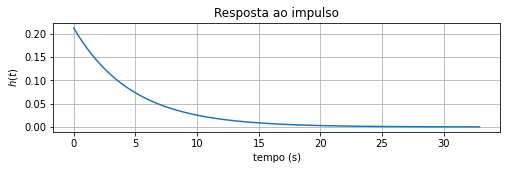

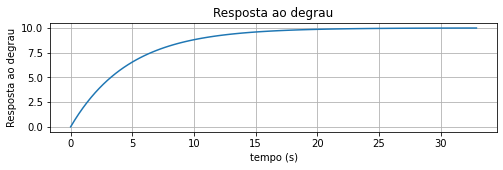

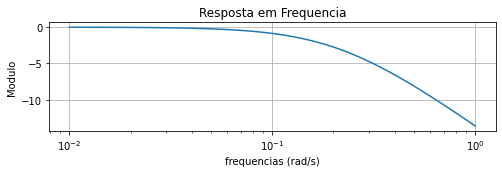

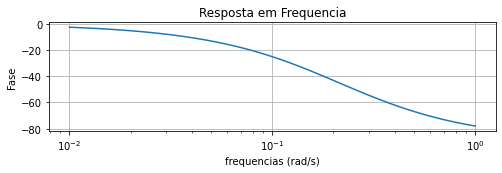

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ### (≈ 30 linhas de código)
t_impulse, y_impulse = signal.impulse(sys)

plt.figure(figsize=(8,2))
plt.plot(t_impulse, y_impulse);
plt.title("Resposta ao impulso");
plt.xlabel('tempo (s)')
plt.ylabel('$h(t)$');
plt.grid(1);

t_step, y_step = signal.step(sys)
plt.figure(figsize=(8,2))
plt.plot(t_step, 10*y_step);
plt.xlabel("tempo (s)")
plt.ylabel("Resposta ao degrau")
plt.title("Resposta ao degrau");
plt.grid(1);

w1, mag1, phase1 = signal.bode(sys)
plt.figure(figsize=(8,2))
plt.semilogx(w1, mag1) #modulo de H1
plt.xlabel("frequencias (rad/s)")
plt.ylabel("Modulo")
plt.title("Resposta em Frequencia")
plt.grid(1);

plt.figure(figsize=(8,2))
plt.semilogx(w1, phase1) #fase de H1
plt.xlabel("frequencias (rad/s)")
plt.ylabel("Fase")
plt.title("Resposta em Frequencia")
plt.grid(1);

### FIM DO CÓDIGO ###

**Saída esperada**:
quatro gráficos: (1) resposta ao impulso, (2) resposta ao degrau com amplitude especificada, (3a) gráfico de módulo do diagrama de Bode do sistema e (3b) gráfico de fase do diagrama de Bode do sistema. Todos com rótulos apropriados.

**Como saber que está correto meu gráfico?** Lembre-se que o gráfico se refere ao circuito RC, que possui apenas um polo real, com constante de tempo $\tau=\frac{1}{RC}$. Seus conhecimentos de ASDL serão úteis para verificar se o gráfico é compatível com o esperado.

___

## Implementação de outro sistema

Agora você irá implementar um sistema linear. Seus conhecimentos em análise de circuitos serão importantes nessa etapa. Mas, antes, escreva seu RA na variável `RA` abaixo e veja qual dos circuitos (1, 2, 3 ou 4) você implementará e também quais os valores dos parâmetros R, L e C.

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ### (1 linha)
RA = 40411 ##http://professor.pucgoias.edu.br/SiteDocente/admin/arquivosUpload/17742/material/Aula%206%20Cap3_Nise%20v2.pdf
### FIM DO CÓDIGO ###

np.random.seed(RA*39+239)
R = np.random.uniform(2,6)
L = np.random.uniform(10,20)
C = np.random.uniform(.4,1.2)
print("ATENÇÃO: você deve implementar o circuito %d, usando os seguintes parâmetros:"%((RA*3+7)%4+1))
print("  R = %.2f Ω\n  L = %.2f H\n  C = %.2f F."%(R,L,C))

ATENÇÃO: você deve implementar o circuito 1, usando os seguintes parâmetros:
  R = 4.99 Ω
  L = 16.46 H
  C = 0.66 F.


| Sistema 1  | Sistema 2 |
| :---:         |     :---:      |
|![](https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/RLC_low-pass.svg/320px-RLC_low-pass.svg.png)| ![](https://upload.wikimedia.org/wikipedia/en/thumb/c/ce/RLC_high-pass.svg/320px-RLC_high-pass.svg.png)|
|       | |
| **Sistema 3** | **Sistema 4** |
|![](https://upload.wikimedia.org/wikipedia/en/thumb/1/14/RLC_series_band-pass.svg/320px-RLC_series_band-pass.svg.png)|![](https://upload.wikimedia.org/wikipedia/en/thumb/0/05/RLC_parallel_band-stop.svg/320px-RLC_parallel_band-stop.svg.png)|

Conforme a saída da célula anterior, para o circuito escolhido, você vai fazer o seguinte:
1. Obtenha a equação diferencial do sistema, explicitando entrada e saída (**a entrada é a tensão na parte "in" do circuito e a saída é a corrente em $R_L$**)
2. Obtenha a função de transferência do sistema no domínio de Laplace
3. Implemente a função de transferência com os valores dos parâmetros indicados na saída da célula acima
4. Mostre o Diagrama de Bode (módulo e fase) e a resposta ao degrau do sistema

Escreva os resultados de forma ***organizada*** nas células seguintes.

___
### Equação Diferencial
<mark>**FAÇA**</mark>: ***apague o exemplo de equação abaixo*** *e escreva a equação diferencial do sistema.*

$$ 4,99  y(t) + 3,29 \dot y(t) + 16,46 \ddot y(t) = x(t) $$


___
### Função de transferência
<mark>**FAÇA**</mark>: ***apague o exemplo de função de transferência abaixo*** *e escreva abaixo a função de transferência do sistema.*

$$ H(s) = \frac{ 1 }{ 16,46 s^2 + 3,29 s + 4,99 }$$


___
### Simulação do sistema

<mark>**Faça**</mark>: 
1. Implemente a função de transferência com os valores dos parâmetros indicados anteriormente
1. Mostre os seguintes gráficos
   - Diagrama de Bode do sistema com gráficos de módulo (dB) e de fase (em graus), com eixo das frequências em Hz
   - Resposta ao degrau do sistema

**Obs.:** TODO gráfico precisa ter rótulo nos eixos. As figuras devem ter tamanho `plt.figure(figsize=(8,2))`!

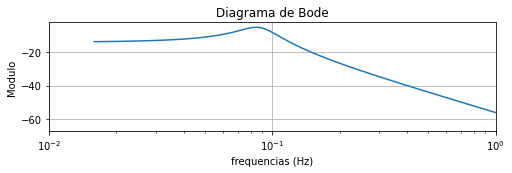

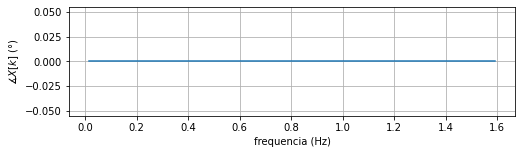

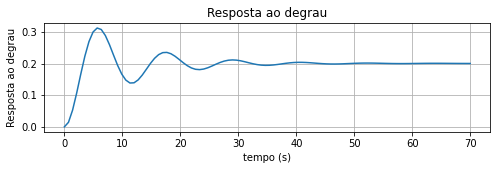

In [52]:
### SEU CÓDIGO COMEÇA AQUI ### (≈ 40 linhas de código)

# Sistema (complete o código!)
import numpy as np, scipy as sp, matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft

# parâmetros
R = 4.99
C = 0.66
L = 16.46

num = [1]
den = [L, R*C, R]
sys = signal.lti(num, den)

# Calcula diagrama de Bode

w1, mag1, phase1 = signal.bode(sys)
phase1 = np.angle(w1, deg=1)

# Converte frequências para Hz

w1 = w1/(2*np.pi)

# Resposta ao degrau

t1, y1 = signal.step(sys)

# Figuras
plt.figure(figsize=(8,2))
plt.semilogx(w1, mag1)
plt.xlim(10**(-2),1)
plt.xlabel("frequencias (Hz)")
plt.ylabel("Modulo")
plt.title("Diagrama de Bode")
plt.grid(1);

plt.figure(figsize=(8,2))
plt.ylabel("$\measuredangle X[k]$ (°)")
plt.xlabel("frequencia (Hz)")
plt.plot(w1, phase1)
plt.grid(1);

plt.figure(figsize=(8,2))
plt.plot(t1, y1)
plt.xlabel("tempo (s)")
plt.ylabel("Resposta ao degrau")
plt.title("Resposta ao degrau");
plt.grid(1);

### FIM DO CÓDIGO ###

**Saída esperada**:
1. diagrama de Bode com magnitude em dB e frequências em Hz;
2. digrama de Bode com fase em graus e eixo das frequências em Hz;
2. resposta ao degrau do sistema.
___

## Simulando o sistema

Agora você vai aplicar um sinal aleatório na entrada do sistema $x(t)$ e verificar a sua respectiva resposta $y(t)$. O código já implementado abaixo constrói o vetor `tempo`, com `N` pontos e período de amostragem `T`. O sinal aleatório é criado na variável `xa`, com distribuição gaussiana, usando a função `np.random.normal(loc=valormedio, scale=desviopadrao, size=numeropontos)`, com média nula e desvio padrão igual a `25`. Você pode fazer ajustes nos parâmetros de criação do sinal aleatório, se achar necessário.

<mark>**Faça**</mark>: 
1. Aplique o sinal `xa` no sistema (circuito RLC), com condições iniciais nulas, e colete a respectiva saída `ya`. Para isso, use a função `signal.lsim` (consulte [esse link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html#scipy.signal.lsim)). Ao usar a função `signal.lsim`, não deixe de passar o vetor `tempo` como parâmetro.
1. Plote, num mesmo gráfico, os sinais de entrada `xa` e de saída `ya` no *domínio do tempo*. O gráfico deve ter tamanho `figsize=(8,2)`.
1. Plote, num mesmo gráfico, o módulo de `xa`, o módulo de `ya` (não precisa plotar a fase!) e a resposta em frequência do sistema. Ajuste as escalas e eixos (frequências em Hz) de modo a ficar claro a modificação que o sistema fez no sinal de entrada `xa` para produzir a saída `ya`.Faça tudo num **único gráfico**, de tamanho `figsize=(8,2)`:
   - módulo da FFT do sinal de entrada `xa` (use a função que você criou na atividade prática anterior!), com frequências em Hz;
   - módulo da FFT do sinal de saída `ya` (use a função que você criou na atividade prática anterior!), com frequências em Hz;
   - módulo da resposta em frequência do sistema (não faça em dB não!), com frequências em Hz.

In [ ]:
########################################################
### INSIRA NESTA CÉLULA A FUNÇÃO PARA CÁLCULO DA FFT ###
########################################################
def serieFourier(...):
    ...

In [ ]:
# Vetor tempo
N = 600
T = 2
tempo = np.linspace(0, N*T, N)

# Sinal aleatório
xa = np.random.normal(loc=0, scale=10, size=len(tempo))


### SEU CÓDIGO COMEÇA AQUI ### (≈ 30 linhas de código)


### FIM DO CÓDIGO ###

**Saída esperada**. Dois gráficos:
1. Sinais `xa` e `ya` no *domínio do tempo*, num único gráfico, com eixos apropriados, legenda, tamanho `figsize=(8,2)` e título "Domínio do Tempo".
1. Gráfico de módulo no domínio da frequência (não faça em dB não!) dos sinais, num mesmo gráfico, dos sinais `xa`, `ya` e da resposta em frequência do sistema, com frequências em Hz, legenda, tamanho `figsize=(8,2)`, escalas apropriadas, evidenciando a ação do sistema no sinal.

___

# Concluões

<mark>**Faça**</mark>: Responda as seguintes perguntas:

**1 - O circuito simulado é um filtro de qual tipo? Justifique mencionando EXPLICITAMENTE o(s) gráfico(s) produzido(s).**

**Resposta:**

`[escreva aqui sua resposta]`

**2 - A curva abaixo mostra a resposta ao degrau de um sistema. Qual valor aproximado da constante de tempo desse sistema?**

<img src="https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_1024/https://electricalacademia.com/wp-content/uploads/2017/07/1-16-1024x895.gif" alt="circuito" width="400"/>

**Resposta:**

`[escreva aqui sua resposta]`

**3 - Para o sistema do item anterior, como seria o Diagrama de Bode do sistema? Descreva em palavras apenas.**

**Resposta:**

`[escreva aqui sua resposta]`

**4 - O que você aprendeu com esse trabalho? Alguma sugestão de melhoria? (essa resposta não vale ponto)**

**Resposta:**

`[escreva aqui sua resposta]`

Bom trabalho :c)

___
# DESAFIO! (opcional)

1. Analise os circuitos abaixo e obtenha função de transferência dos filtros abaixo.
1. Simule os filtros e obtenha diagrama de Bode dos sistemas.
1. Simule a composição em série dos circuitos abaixo. Qual tipo de filtro foi produzido?
1. Alterando parâmetros do sistema (valores de resistências, capacitâncias ou indutâncias) e observando a resposta em frequência, produza, a partir dos circuitos, um filtro passa-faixa. Mostre quais são as frequências de corte e de passagem do filtro produzido.
1. Alterando parâmetros do sistema (valores de resistências, capacitâncias ou indutâncias) e observando a resposta em frequência, produza, a partir dos circuitos, um filtro rejeita-faixa. Mostre quais são as frequências de corte e de passagem do filtro produzido.

**Circuito A:**

![](https://upload.wikimedia.org/wikipedia/commons/5/5c/Sallen-Key_Lowpass_Example.svg)

**Circuito B:**

![](https://upload.wikimedia.org/wikipedia/commons/e/ec/Sallen-Key_Highpass_Example.svg)


In [ ]:
### SEU CÓDIGO COMEÇA AQUI ###


### FIM DO CÓDIGO ###

Fim (ufa!)